In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed=2024
np.random.seed(seed)

prefix="6C"

In [2]:
df = pd.read_csv('../../data/dataframes/all_patchs_dataframe_augmented.csv')
df=df.sort_values(by=['Patient'])
df['Patient'].unique()

array([  2,   3,   4,   5,   6,   7,   9,  13,  14,  16,  17,  22,  23,
        32,  40,  44,  58,  72, 114, 133, 169, 192, 226, 230, 231, 247,
       398])

In [3]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

In [4]:
df['label']=df['classe'].apply(lambda x : all_classes[x]) 
df['label'] = df['label'].apply(lambda x: idx_to_label[x])
df

,Patient,lame,patch,classe,label
24674,2,B,2_B_row_39_col_34.jpg,Hémorragique,1
79955,2,B,2_B_row_13_col_37_HF.jpg,Tissu lymphoïde,3
53760,2,B,2_B_row_53_col_61_HF.jpg,Papillaire,5
53757,2,B,2_B_row_9_col_28_VF.jpg,Papillaire,5
53749,2,B,2_B_row_51_col_48_VF.jpg,Papillaire,5
...,...,...,...,...,...
65909,398,R,R_398_A (184).jpg,Réactionnel,0
65911,398,R,R_398_A (1465)_VF.jpg,Réactionnel,0
28521,398,H,H_398_A (17)_rot270.jpg,Hémorragique,1
65887,398,R,R_398_A (301)_VF.jpg,Réactionnel,0


In [5]:
for p in df['Patient'].unique():
    print(p,'\n',dict(df.loc[df['Patient']==p]['label'].value_counts()))

2 
 {5: 1845, 4: 1248, 1: 810, 3: 180, 0: 159}
3 
 {0: 1713, 5: 108, 4: 24, 3: 9}
4 
 {3: 603, 5: 156, 1: 72, 0: 54}
5 
 {5: 258, 0: 45, 3: 36, 1: 27}
6 
 {5: 438, 0: 159, 1: 27}
7 
 {0: 11859, 4: 2346, 5: 1812, 3: 846, 1: 54}
9 
 {2: 7596, 4: 5652, 0: 597, 5: 345, 1: 54}
13 
 {5: 1395, 0: 36, 3: 27, 4: 6}
14 
 {5: 897, 1: 108, 3: 27, 0: 15}
16 
 {2: 516, 5: 102, 1: 18}
17 
 {2: 234, 1: 90, 5: 36, 3: 27, 0: 3}
22 
 {5: 174, 0: 6}
23 
 {5: 345, 1: 135, 0: 81, 3: 36, 2: 6}
32 
 {3: 801, 1: 486, 5: 153}
40 
 {5: 576, 1: 126, 3: 18, 0: 15}
44 
 {1: 1224, 5: 726, 0: 309}
58 
 {1: 198, 3: 162, 5: 54, 0: 39}
72 
 {5: 3852, 4: 756, 3: 414, 0: 399, 1: 36}
114 
 {5: 297}
133 
 {5: 1878, 1: 225}
169 
 {5: 2070, 0: 1593, 1: 198, 4: 144}
192 
 {5: 685, 1: 423, 3: 117, 0: 18}
226 
 {1: 693, 5: 636, 3: 522}
230 
 {5: 1086, 1: 144, 2: 48, 3: 27}
231 
 {5: 5451, 4: 3462, 2: 828, 0: 810, 3: 387, 1: 144}
247 
 {5: 1104, 0: 468, 4: 24}
398 
 {0: 4917, 1: 873, 4: 204, 5: 102}


In [6]:
patients_test={2 : 'test', 4 : 'test',5 : 'test',14 : 'test', 17 : 'test',44 : 'train', 133: "test", 247 : 'test', 398 : 'test'}
patients_train={3 : 'train',
                6 : 'train',
                7 : 'train',
                9 : 'train',
                13 :  'train',
                16 : 'train',
                22 : 'train',
                23 : 'train',
                32 : "train" ,
                40 : 'train',
                58 : 'train',
                72 : 'train',
                114 : 'train',
                169 : 'train',
                192 : 'train',
                226 : "train",
                230 :'train',
                231 :'train',
                }

patients_to_dataset = {**patients_train, **patients_test}

print(len(patients_to_dataset), len(patients_train), len(patients_test))
df['dataset']=df['Patient'].apply(lambda x : patients_to_dataset[int(x)])

27 18 9


In [7]:

df['TetraClass']=df['label'].apply(lambda x: label_to_idx[x])
df=df.sort_values(by='label')
df

,Patient,lame,patch,classe,label,dataset,TetraClass
58486,398,R,R_398_A (145)_HF.jpg,Réactionnel,0,test,P
59773,7,R,R_7_A (3844).jpg,Réactionnel,0,train,P
71155,231,R,R_231_A (11)_VF.jpg,Réactionnel,0,train,P
64698,231,R,R_231_A (16)_VF.jpg,Réactionnel,0,train,P
64653,231,R,R_231_A (263).jpg,Réactionnel,0,train,P
...,...,...,...,...,...,...,...
2833,169,A,A_169_A (38).jpg,Acinaire,5,train,T
19145,169,Fo,Fo_169_A (193)_rot45.jpg,Foetal,5,train,T
17632,169,Fo,Fo_169_A (300).jpg,Foetal,5,train,T
17624,169,Fo,Fo_169_A (225)_HF.jpg,Foetal,5,train,T


In [27]:
train_path = f"../../data/dataframes/df_train_{prefix}_augmented.csv"
test_path = f"../../data/dataframes/df_test_{prefix}_augmented.csv"

dtrain= df.loc[df['dataset']=='train']
dtest = df.loc[df['dataset']=='test']

dtrain.to_csv(train_path, index=False)
dtest.to_csv(test_path, index=False)
print('train')
print(dtrain['label'].value_counts())

print("\ntest")
print(dtest['label'].value_counts())

train
label
5    20305
0    17634
4    12390
2     8994
1     3960
3     3366
Name: count, dtype: int64

test
label
5    6276
0    5661
1    2205
4    1476
3     873
2     234
Name: count, dtype: int64


In [8]:
if prefix=="7C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'gold', 'crimson']
elif prefix=="6C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson']
explode=tuple([0.05]*len(colors))

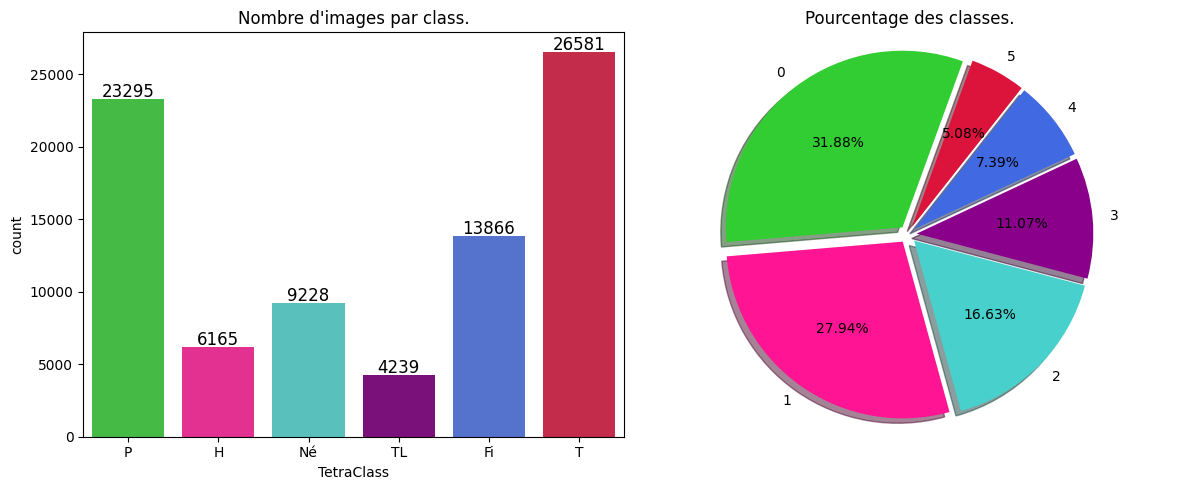

In [9]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df, x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Nombre d'images par class.")
plt.subplot(122)
sizes = [df["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, colors=colors, labels=list(idx_to_label.values()),  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Pourcentage des classes.')
plt.tight_layout()
plt.savefig(f'Statistiques des images_{prefix}.jpeg')
plt.show()

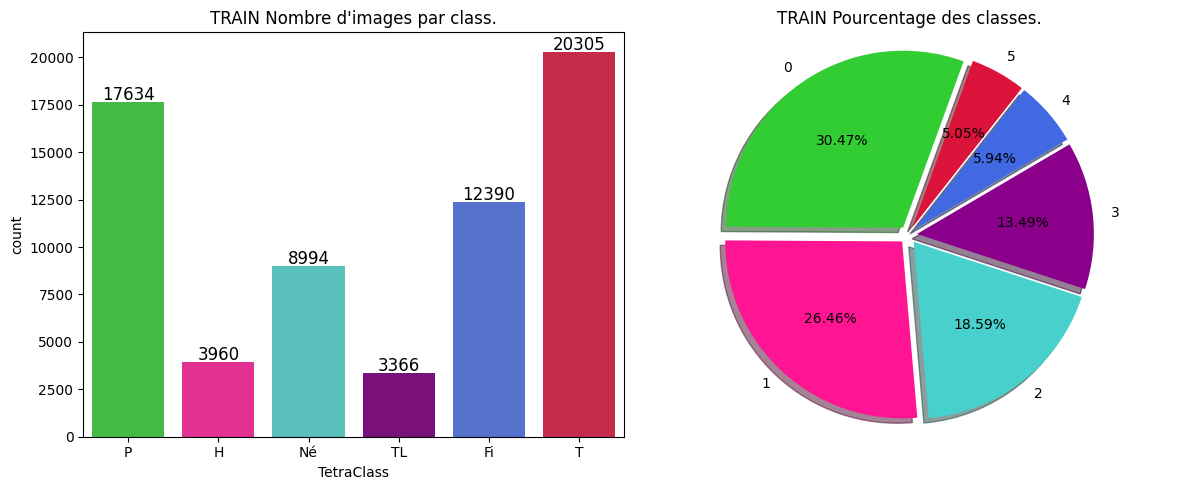

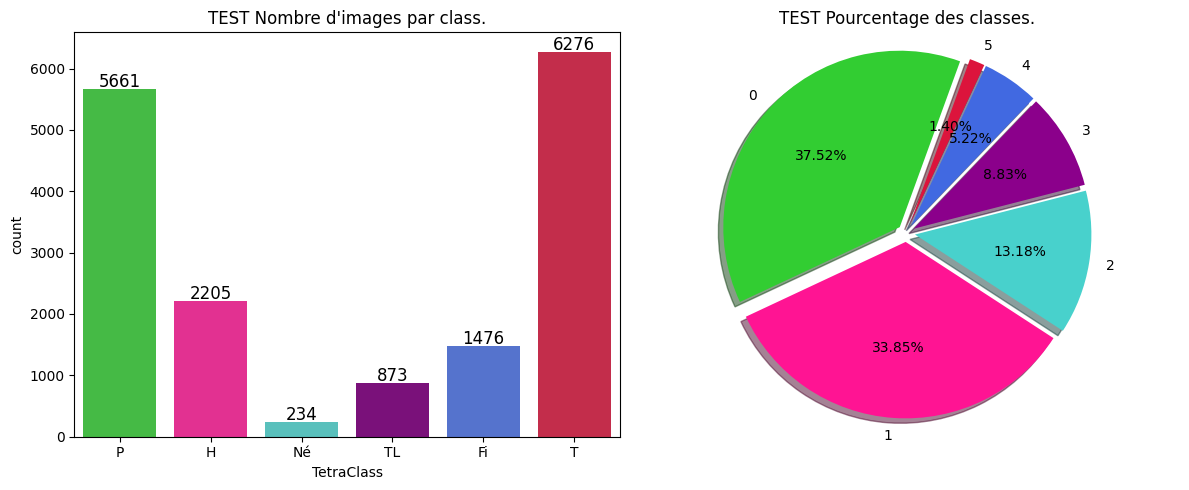

In [10]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df.loc[df['dataset']=='train'], x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("TRAIN Nombre d'images par class.")

plt.subplot(122)
sizes = [df.loc[df['dataset']=='train']["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('TRAIN Pourcentage des classes.')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df.loc[df['dataset']=='test'], x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("TEST Nombre d'images par class.")

plt.subplot(122)
sizes = [df.loc[df['dataset']=='test']["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('TEST Pourcentage des classes.')
plt.tight_layout()
plt.show()